In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
A_images = []
B_images = []
C_images = []
for folder in os.listdir("/Users/KANISHKA/Technocolabs_DataScience_Internship/Final Project/cvdata"):
    for image in os.listdir(f"/Users/KANISHKA/Technocolabs_DataScience_Internship/Final Project/cvdata/{folder}"):
        if folder == 'A':
            img = cv2.imread(f"/Users/KANISHKA/Technocolabs_DataScience_Internship/Final Project/cvdata/{folder}/{image}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100,100))
            A_images.append(img)
        elif folder == 'B':
            img = cv2.imread(f"/Users/KANISHKA/Technocolabs_DataScience_Internship/Final Project/cvdata/{folder}/{image}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100,100))
            B_images.append(img)
        else:
            img = cv2.imread(f"/Users/KANISHKA/Technocolabs_DataScience_Internship/Final Project/cvdata/{folder}/{image}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100,100))
            C_images.append(img)

In [3]:
A_images = np.asarray(A_images)
B_images = np.asarray(B_images)
C_images = np.asarray(C_images)

In [4]:
A_images.shape, B_images.shape, C_images.shape

((1000, 100, 100), (1000, 100, 100), (1000, 100, 100))

In [5]:
A_images = A_images.reshape((1000,100,100,1))
B_images = B_images.reshape((1000,100,100,1))
C_images = C_images.reshape((1000,100,100,1))
A_images.shape, B_images.shape, C_images.shape

((1000, 100, 100, 1), (1000, 100, 100, 1), (1000, 100, 100, 1))

In [6]:
a_labels = np.asarray([0]*len(A_images))
b_labels = np.asarray([1]*len(B_images))
c_labels = np.asarray([2]*len(C_images))
a_labels.shape, c_labels.shape, c_labels.shape

((1000,), (1000,), (1000,))

In [7]:
images = np.vstack((A_images, B_images, C_images))
labels = np.hstack((a_labels, b_labels, c_labels))

In [8]:
images.shape, labels.shape

((3000, 100, 100, 1), (3000,))

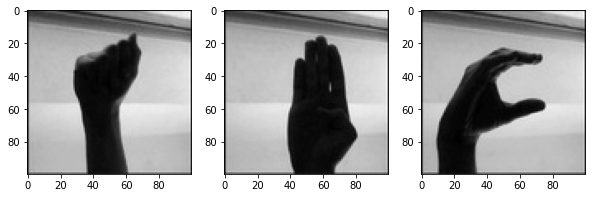

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(images[0].reshape((100,100)), cmap="gray")
plt.subplot(1,3,2)
plt.imshow(images[1001].reshape((100,100)), cmap="gray")
plt.subplot(1,3,3)
plt.imshow(images[2001].reshape((100,100)), cmap="gray")
plt.show()

In [10]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

[1 0 1 2 0 2 2 1 0 2 2 0 1 2 0 2 2 2 0 2 2 0 2 2 2]


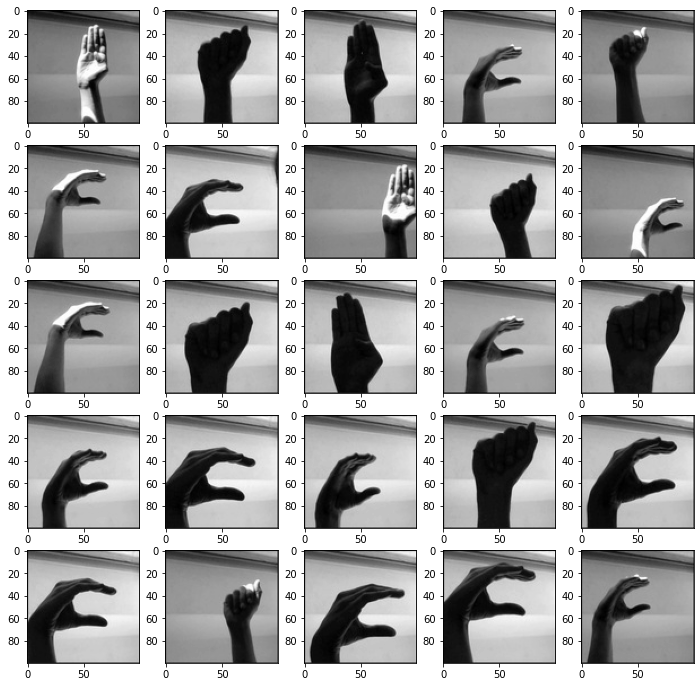

In [11]:
print(labels[:25])
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(images[i].reshape((100,100)), cmap = "gray")
plt.show()

In [12]:
from keras.utils import to_categorical
labels = to_categorical(labels, 3)

Using TensorFlow backend.


In [13]:
labels.shape

(3000, 3)

In [14]:
images = images / 255.0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2400, 100, 100, 1), (2400, 3), (600, 100, 100, 1), (600, 3))

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [17]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=5)

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 326s 136ms/step - loss: 0.6906 - accuracy: 0.6708 - val_loss: 0.1565 - val_accuracy: 0.9550
Epoch 2/5
2400/2400 [==============================] - 278s 116ms/step - loss: 0.0342 - accuracy: 0.9921 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/5
2400/2400 [==============================] - 264s 110ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.9458e-04 - val_accuracy: 1.0000
Epoch 4/5
2400/2400 [==============================] - 305s 127ms/step - loss: 1.7451e-04 - accuracy: 1.0000 - val_loss: 1.3968e-04 - val_accuracy: 1.0000
Epoch 5/5
2400/2400 [==============================] - 312s 130ms/step - loss: 8.8811e-05 - accuracy: 1.0000 - val_loss: 9.3343e-05 - val_accuracy: 1.0000


In [20]:
print(np.argmax(y_test[595]))
print(np.argmax(model.predict(X_test[595].reshape((1,100,100,1)))))

1
1


In [21]:
model_json = model.to_json()
with open("3_alphabet_ASL_Model.json", "w") as json_file:
    json_file.write(model_json)

In [22]:
model.save_weights("3_alphabet_ASL_Model_weights.h5")